## Exploratory Data Analysis for Restuarant Reviews Dataset

### Import dependencies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
import re

# Set plot style
sns.set(style="whitegrid")
print("Libraries imported successfully")

Libraries imported successfully


### Load the cleaned dataset

In [15]:
df = pd.read_csv("../data/cleaned_reviews.csv")
print("Columns: ", df.columns.tolist())
print("Data Size: ", df.shape)

Columns:  ['store_name', 'rating', 'review', 'reviewer_name']
Data Size:  (2032, 4)


### Basic Summary Statistics

In [16]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("Rating distribution:")
print(df['rating'].value_counts(normalize=True))
print("\nReview length summary:")
print(df['review_length'].describe())

print(f"\nUnique store names: {df['store_name'].nunique()}\n")
print(f"Unique reviewer names: {df['reviewer_name'].nunique()}")

Rating distribution:
rating
5    0.540846
4    0.242126
3    0.103346
1    0.065453
2    0.048228
Name: proportion, dtype: float64

Review length summary:
count    2032.000000
mean       27.104331
std        36.815226
min         1.000000
25%         8.000000
50%        18.000000
75%        30.000000
max       486.000000
Name: review_length, dtype: float64

Unique store names: 110

Unique reviewer names: 1998


### Ratings Visualisation

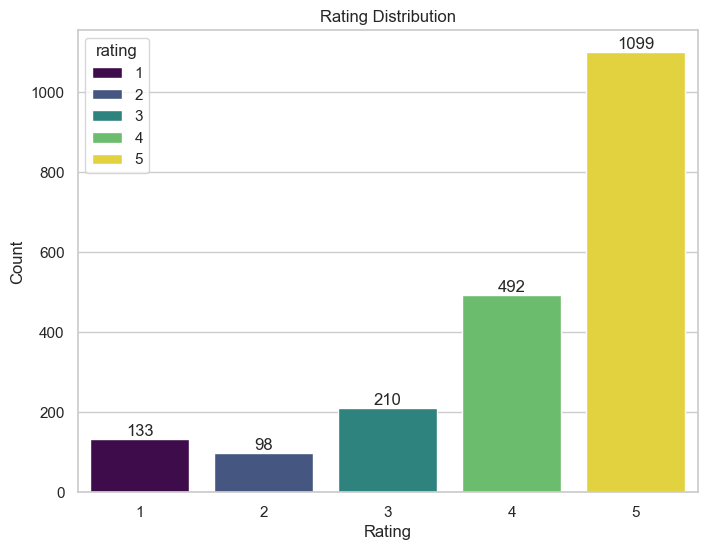

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', data=df, hue='rating', palette='viridis')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('../plots/rating_distribution.png')
plt.show()

### Review Length Distribution

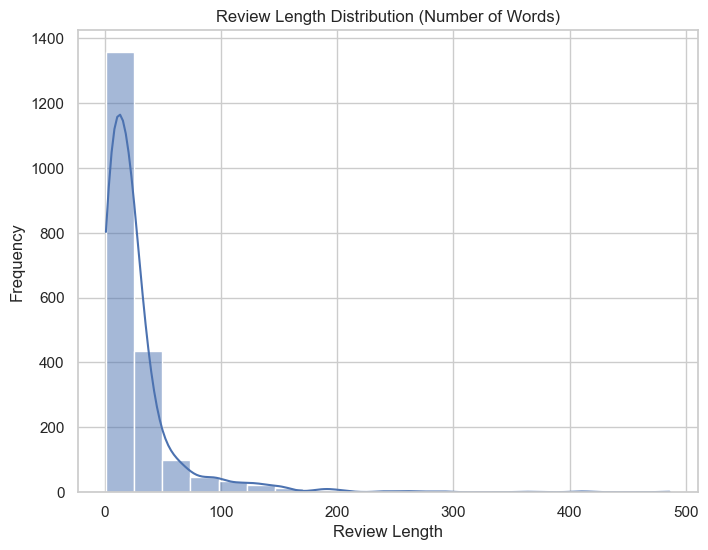

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=20, kde=True)
plt.title('Review Length Distribution (Number of Words)')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.savefig('../plots/review_length_distribution.png')
plt.show()